<br>
<div class= 'alert alert-block alert-danger'>
<b>

## Using 3 approaches to impute missing values
##### - A. Using `sklearn.linear_model.BayesianRidge()` algorithm
##### - B. Using Deep Neural Network to impute missing data
##### - C. Using Deep Neural Network with `Bayesian loss` to impute missing values
</b>
<p>
</div>

In [1]:
### local conda kernel - ds-gis2

import itertools as itools
import pandas as pd
import numpy as np
import pathlib
import geopandas as gpd
import geopandas as pdg
import shapely.geometry as shpy
import keras.layers as klyr
import keras.models as kmodel
import keras.backend as kerasb
import math, os
import random
import matplotlib
import matplotlib.pyplot as plt
# print(  plt.style.available  )
import xgboost
import seaborn as sns
import sklearn
import sklearn.preprocessing as skPreprocess
from sklearn import model_selection
import missingno as msno
import keras
import tensorflow as tf
from keras import layers as klyr
import PIL as pil
import os
os.environ[ 'SM_FRAMEWORK' ] = 'tf.keras'
import glob
%matplotlib inline
np.random.seed(1)

from IPython.core.display import display, HTML
display(  HTML( '<style>.container { width:98% !important; }</style>' )  )
pd.set_option('display.max_columns', None)
# %config Completer.use_jedi = False
DIR_dataset = r'E:\Projects\climateTrace\dataset_usa'
# DIR_dataset = r'/mnt/e/Projects/climateTrace/dataset_usa/climateTrace_emission_dataset'

C:\Users\madhur\AppData\Local\Temp\ipykernel_30296\2637461400.py:34: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [7]:
climateTrace_df = pd.read_csv( 'preProcessed_ClimateTrace_data2.csv' )

## this is preprocess, cleaned data which was retrived from the Climate Trace website

# Define numerical and categorical columns
num_col = [ 'emissions_quantity', 'area', 'emissions_factor', 'capacity', 'activity',
            'biomass_emissions', 'biomass_capacity', 'biomass_generation', 'pop2020', 'capacity_factor']
cat_OneHotEncoded = [ 'sourceType_coal', 'sourceType_gas', 'sourceType_oil', 'sourceType_other_fossil',
                      'sourceType_waste' ]

In [8]:
print( climateTrace_df.shape )
climateTrace_df.head()

(26547, 15)


,emissions_quantity,area,emissions_factor,capacity,activity,biomass_emissions,biomass_capacity,biomass_generation,pop2020,capacity_factor,sourceType_coal,sourceType_gas,sourceType_oil,sourceType_other_fossil,sourceType_waste
0,0.014450,0.197121,NaN,0.031423,0.026391,NaN,NaN,NaN,0.11415,0.345,0,1,0,0,0
1,0.014450,0.197121,NaN,0.031423,0.026391,NaN,NaN,NaN,0.11415,0.345,0,1,0,0,0
2,0.014450,0.197121,0.173876,0.031423,0.026391,NaN,NaN,NaN,0.11415,0.345,0,1,0,0,0
3,0.013564,0.197121,NaN,0.031423,0.024801,NaN,NaN,NaN,0.11415,0.324,0,1,0,0,0
4,0.013564,0.197121,NaN,0.031423,0.024801,NaN,NaN,NaN,0.11415,0.324,0,1,0,0,0


<hr><br>

### A. Using `sklearn.linear_model.BayesianRidge()` algorithm

In [9]:
# Impute missing values using BayesianRidge
import fancyimpute
imputer_obj = fancyimpute.IterativeImputer(
    estimator= sklearn.linear_model.BayesianRidge(), max_iter= 100,
    initial_strategy= 'mean', imputation_order= 'random',
    skip_complete= False, verbose= 1   )
climateTrace_Imputed_df = pd.DataFrame(
                imputer_obj.fit_transform( climateTrace_df ),
                columns= climateTrace_df.columns  )

[IterativeImputer] Completing matrix with shape (26547, 15)
[IterativeImputer] Change: 0.8378194312070157, scaled tolerance: 0.0010000000000000002 
[IterativeImputer] Change: 0.6914091747629523, scaled tolerance: 0.0010000000000000002 
[IterativeImputer] Change: 0.1989974445257514, scaled tolerance: 0.0010000000000000002 
[IterativeImputer] Change: 0.0889672873422056, scaled tolerance: 0.0010000000000000002 
[IterativeImputer] Change: 0.050320309166816346, scaled tolerance: 0.0010000000000000002 
[IterativeImputer] Change: 0.05964722897269925, scaled tolerance: 0.0010000000000000002 
[IterativeImputer] Change: 0.0437547880453204, scaled tolerance: 0.0010000000000000002 
[IterativeImputer] Change: 0.03375054350186024, scaled tolerance: 0.0010000000000000002 
[IterativeImputer] Change: 0.024347524937025522, scaled tolerance: 0.0010000000000000002 
[IterativeImputer] Change: 0.027208695493203094, scaled tolerance: 0.0010000000000000002 
[IterativeImputer] Change: 0.02450070918506786, scal

In [10]:
climateTrace_DropNA_df = climateTrace_df.dropna().reset_index( drop= True )
climateTrace_DropNA_df.head()

,emissions_quantity,area,emissions_factor,capacity,activity,biomass_emissions,biomass_capacity,biomass_generation,pop2020,capacity_factor,sourceType_coal,sourceType_gas,sourceType_oil,sourceType_other_fossil,sourceType_waste
0,0.000545,0.320104,0.124682,0.001155,0.001272,0.429825,0.422316,0.422287,0.182961,0.359,0,0,0,0,0
1,0.000545,0.320104,0.124682,0.001155,0.001272,0.429825,0.422316,0.422287,0.182961,0.359,0,1,0,0,0
2,0.000545,0.320104,0.142494,0.001155,0.001208,0.429825,0.426554,0.425220,0.182961,0.342,0,0,0,0,0
3,0.000545,0.320104,0.142494,0.001155,0.001208,0.429825,0.426554,0.425220,0.182961,0.342,0,1,0,0,0
4,0.000477,0.320104,0.102629,0.001155,0.001208,0.429825,0.423729,0.423754,0.182961,0.342,0,0,0,0,0


In [11]:
# checking metrices for sklearn.linear_model.BayesianRidge() algo
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import IterativeImputer

# Create missing data for testing
np.random.seed(0)
missing_mask = np.random.rand(*climateTrace_DropNA_df.shape) < 0.1  # 10% missing data
test_data = climateTrace_DropNA_df.copy()
test_data[missing_mask] = np.nan

# Original data without missing values to act as ground truth
yi_df = climateTrace_DropNA_df.copy()

# Impute missing values
imputer = sklearn.impute.IterativeImputer(  estimator= sklearn.linear_model.BayesianRidge(),
            max_iter= 100, initial_strategy='mean', imputation_order='random',
            skip_complete= False, verbose= 1  )

In [12]:
imputed_data = imputer.fit_transform( test_data )

[IterativeImputer] Completing matrix with shape (158, 15)
[IterativeImputer] Change: 0.9251380647582982, scaled tolerance: 0.001 
[IterativeImputer] Change: 0.5974757345676338, scaled tolerance: 0.001 
[IterativeImputer] Change: 0.05415007999345445, scaled tolerance: 0.001 
[IterativeImputer] Change: 0.013234789847109213, scaled tolerance: 0.001 
[IterativeImputer] Change: 0.013638582592484573, scaled tolerance: 0.001 
[IterativeImputer] Change: 0.009038010698786991, scaled tolerance: 0.001 
[IterativeImputer] Change: 0.0012166133104049744, scaled tolerance: 0.001 
[IterativeImputer] Change: 0.0057860674729663525, scaled tolerance: 0.001 
[IterativeImputer] Change: 0.002794219296286593, scaled tolerance: 0.001 
[IterativeImputer] Change: 0.0025059874428723494, scaled tolerance: 0.001 
[IterativeImputer] Change: 0.0019293228266744934, scaled tolerance: 0.001 
[IterativeImputer] Change: 0.0008515133998719254, scaled tolerance: 0.001 
[IterativeImputer] Early stopping criterion reached.


In [13]:
yhat_df = pd.DataFrame(imputed_data, columns=climateTrace_DropNA_df.columns)
# # Calculate metrics
mae = np.round(   mean_absolute_error(yi_df[missing_mask], yhat_df[missing_mask]), 3  )
mse = np.round(  np.mean(  np.square(yi_df - yhat_df)  ), 3  )
rmse = np.round(  np.sqrt( mean_squared_error( yi_df[missing_mask], yhat_df[missing_mask] ) ), 3  )

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.002
Root Mean Squared Error (RMSE): 0.063
Mean Absolute Error (MAE): 0.01


<hr><br>

###  B. Using Deep Neural Network to impute missing data

In [8]:
import fancyimpute as fimpute
import sklearn.neural_network 
# from sklearn.neural_network import MLPRegressor

# Impute numerical columns using IterativeImputer with MLPRegressor
imputer_obj = fimpute.IterativeImputer(
    estimator=  sklearn.neural_network.MLPRegressor(
                        hidden_layer_sizes= (50,25,12), activation= 'relu', solver= 'adam',
                        batch_size= 100, learning_rate='adaptive', 
                        max_iter= 10, early_stopping= True, validation_fraction= 0.1,
                        random_state= 42,
                        verbose= 2
                )
)

In [1]:
climateTrace_Imputer_df = pd.DataFrame(  imputer_obj.fit_transform( climateTrace_df ), columns= climateTrace_df.columns  )

In [10]:
climateTrace_Imputer_df

,emissions_quantity,area,emissions_factor,capacity,activity,biomass_emissions,biomass_capacity,biomass_generation,pop2020,capacity_factor,sourceType_coal,sourceType_gas,sourceType_oil,sourceType_other_fossil,sourceType_waste
0,0.014450,0.197121,0.131601,0.031423,0.026391,0.498541,0.497060,0.497157,0.114150,0.345,0.0,1.0,0.0,0.0,0.0
1,0.014450,0.197121,0.131601,0.031423,0.026391,0.498541,0.497060,0.497157,0.114150,0.345,0.0,1.0,0.0,0.0,0.0
2,0.014450,0.197121,0.173876,0.031423,0.026391,0.492848,0.491352,0.491795,0.114150,0.345,0.0,1.0,0.0,0.0,0.0
3,0.013564,0.197121,0.126235,0.031423,0.024801,0.500085,0.498599,0.498597,0.114150,0.324,0.0,1.0,0.0,0.0,0.0
4,0.013564,0.197121,0.126235,0.031423,0.024801,0.500085,0.498599,0.498597,0.114150,0.324,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26542,0.002181,0.261120,0.011026,0.007625,0.006614,0.533546,0.531782,0.532265,0.243844,0.346,0.0,1.0,0.0,0.0,0.0
26543,0.002181,0.261120,0.122615,0.007625,0.006614,0.517782,0.516057,0.516518,0.243844,0.346,0.0,1.0,0.0,0.0,0.0
26544,0.002181,0.261120,0.122615,0.007625,0.006614,0.517782,0.516057,0.516518,0.243844,0.346,0.0,1.0,0.0,0.0,0.0
26545,0.002045,0.261120,0.124948,0.007625,0.006296,0.515892,0.514168,0.514626,0.243844,0.329,0.0,1.0,0.0,0.0,0.0


In [11]:
climateTrace_DropNA_df = climateTrace_df.dropna().reset_index( drop= True )
yi_df = climateTrace_DropNA_df.copy()

# Create missing data for testing
np.random.seed(0)
missing_mask = np.random.rand(*climateTrace_DropNA_df.shape) < 0.1  # 10% missing data
test_data = climateTrace_DropNA_df.copy()
test_data[missing_mask] = np.nan
test_data.head()

,emissions_quantity,area,emissions_factor,capacity,activity,biomass_emissions,biomass_capacity,biomass_generation,pop2020,capacity_factor,sourceType_coal,sourceType_gas,sourceType_oil,sourceType_other_fossil,sourceType_waste
0,0.000545,0.320104,0.124682,0.001155,0.001272,0.429825,0.422316,0.422287,0.182961,0.359,0.0,0.0,0.0,0.0,NaN
1,NaN,NaN,0.124682,0.001155,0.001272,0.429825,0.422316,0.422287,0.182961,0.359,0.0,1.0,0.0,0.0,0.0
2,0.000545,0.320104,0.142494,0.001155,NaN,0.429825,0.426554,0.425220,0.182961,0.342,0.0,0.0,0.0,NaN,0.0
3,0.000545,0.320104,0.142494,0.001155,0.001208,0.429825,0.426554,0.425220,0.182961,0.342,0.0,1.0,0.0,0.0,0.0
4,0.000477,0.320104,0.102629,0.001155,0.001208,0.429825,0.423729,NaN,0.182961,NaN,0.0,0.0,0.0,0.0,0.0


In [3]:
yhat_df = climateTrace_Imputer_df.copy()
yhat = imputer_obj.fit_transform(test_data)

In [13]:
yhat_df = pd.DataFrame( yhat, columns=climateTrace_df.columns)

In [14]:
# # Calculate metrics
mae = mean_absolute_error(yi_df[missing_mask], yhat_df[missing_mask])
mse = np.round(  np.mean(  np.square(yi_df - yhat_df)  ), 3  )
rmse = np.sqrt(mean_squared_error(yi_df[missing_mask], yhat_df[missing_mask]))

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.052
Root Mean Squared Error (RMSE): 0.2889471753472881
Mean Absolute Error (MAE): 0.10328980960466655


<hr><br>

###  C. Using Deep Neural Network with `Bayesian loss` to impute missing values

In [15]:
from sklearn.model_selection import train_test_split

# Split the climateTrace_df into features (X) and target variable (y)
X_num = climateTrace_df[num_col]
X_cat = climateTrace_df[cat_OneHotEncoded]
y = climateTrace_df[num_col]

# Handle missing values in the target variable
y = y.fillna(y.mean())

# Split the data into training and testing sets
X_num_train, X_num_test, X_cat_train, X_cat_test, y_train, y_test = \
        train_test_split( X_num, X_cat, y, test_size= 0.2, random_state= 42 )

In [16]:
# Define the input layers
input_num = keras.layers.Input(  shape= ( len(num_col), )  )
input_cat = keras.layers.Input(  shape= ( len(cat_OneHotEncoded), )  )

# Concatenate the input layers
concat_layer = keras.layers.concatenate([input_num, input_cat])

# Define the deep neural network layers with dropout
lyr1 = klyr.Dense(  256, activation='relu'  )(concat_layer)
lyr2 = klyr.Dropout(0.2)(  lyr1, training= True  )
lyr3 = klyr.Dense(  128, activation='relu'  )(lyr2)
lyr4 = klyr.Dropout(0.2)( lyr3, training= True )
lyr5 = klyr.Dense(  64, activation='relu'  )(lyr4)
lyr6 = klyr.Dropout(0.2)(  lyr5, training= True  )
lyr7 = klyr.Dense(  32, activation='relu'  )(lyr6)
lyr8 = klyr.Dropout(0.2)(  lyr7, training= True  )
lyr9 = klyr.Dense(  16, activation='relu'  )(lyr8)
lyr10 = klyr.Dropout(0.2)(  lyr9, training= True  )
lyr11 = klyr.Dense(  8, activation= 'relu'  )(lyr10)
lyr12 = klyr.Dropout(0.2)(  lyr11, training= True  )

output_layer = klyr.Dense( len(num_col) )(lyr12)

# Create the model
bayesian_NeuralNw_Model = keras.Model(  inputs= [ input_num, input_cat ], outputs= output_layer  )

In [17]:
#  custom Bayesian loss
def bayesian_loss( y_true, y_pred ):
    # Mask the missing values in y_true
    mask = tf.cast(  tf.not_equal(y_true, 0), dtype= tf.float32  )
    # Calculate the mean squared error only for non-missing values
    mse = tf.reduce_sum(  tf.square(y_true - y_pred) * mask  ) / tf.reduce_sum(mask)
    # Calculate the KL divergence between the predicted distribution and a prior distribution
    kl_divergence = keras.losses.KLDivergence()( y_true, y_pred )
    # Combine the MSE and KL divergence losses
    tot_bayesian_loss = mse + 0.05 * kl_divergence
    
    return tot_bayesian_loss

In [18]:
# Compile the model
bayesian_NeuralNw_Model.compile( optimizer=keras.optimizers.Adam(), loss= bayesian_loss )

In [19]:
# Train the model
bayesian_NeuralNw_Model_fit = bayesian_NeuralNw_Model.fit(
    [X_num_train, X_cat_train], y_train, epochs= 15, verbose= 1  )

Epoch 1/15


664/664 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4361
Epoch 2/15
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1563
Epoch 3/15
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0729
Epoch 4/15
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0345
Epoch 5/15
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0172
Epoch 6/15
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0124
Epoch 7/15
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0118
Epoch 8/15
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0108
Epoch 9/15
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0110
Epoch 10/15
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0115
Epoch 11/15
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0111
Epoch 12/15
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0115
Epoch 13/15
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0109
Epoch 14/15
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0112
Epoch 15/15
664/664 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0113


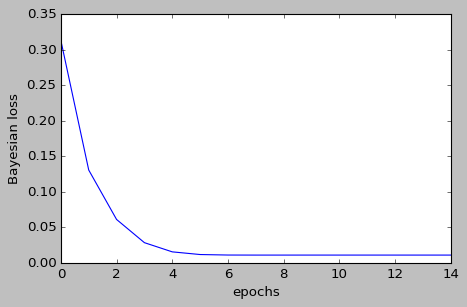

In [20]:
plt.style.use( 'classic' )

fg, ax = plt.subplots( 1,1, figsize= ( 6,4 ) )
ax.plot( bayesian_NeuralNw_Model_fit.history['loss']  )
ax.set_xlabel( 'epochs' ); ax.set_ylabel( 'Bayesian loss' )

plt.tight_layout()

In [21]:
# Evaluate the model on the test set
test_loss = bayesian_NeuralNw_Model.evaluate([X_num_test, X_cat_test], y_test, verbose=0)
print( 'Test bayesian loss:', np.round(test_loss,3) ) 

# Perform interpolation on missing values using Monte Carlo dropout
X_num_interpolated = X_num.fillna(X_num.mean())
mc_samples = 100
mc_predictions = []

Test bayesian loss: 0.011


In [22]:
## monto carlo prediction
for _ in range(mc_samples):
    y_pred = bayesian_NeuralNw_Model.predict([X_num_interpolated, X_cat])
    mc_predictions.append(y_pred)

y_pred_mean = np.mean(  mc_predictions, axis= 0  )

830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 856us/step
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 823us/step
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 878us/step
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 823us/step
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 833us/step
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 840us/step
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 855us/step
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 826us/step
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 831us/step
830/830 ━━━━━━━━━━━━━━━━━━━━ 1s 824us/step
830/830 ━━━

In [23]:
# Create a DataFrame to store the interpolated climateTrace_df
yhat_df = pd.DataFrame(y_pred_mean, columns=num_col)
yi_df = climateTrace_df[ yhat_df.columns ].dropna()
yhat_df = yhat_df.loc[ yi_df.index, : ]

In [24]:
mse = np.round(  np.mean(  np.square(yi_df - yhat_df)  ), 3  )
rmse = np.round( np.sqrt(mse), 3)
mae = np.round(  np.mean(np.abs(yi_df - yhat_df)), 3)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.067
Root Mean Squared Error (RMSE): 0.259
Mean Absolute Error (MAE): 0.234
